In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
linkedin_file = "temp_datalab_records_linkedin_company.csv"
# from data incubator / thinkium
activision_stock_file = "ATVI.csv"
# https://finance.yahoo.com/quote/ATVI/history?p=ATVI&.tsrc=fin-srch
activision_googletrends_file = "activision_multiTimeline.csv"
# https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=activision
activision_stock_df = pd.read_csv(activision_stock_file, parse_dates = ["Date"])
df = pd.read_csv(linkedin_file, parse_dates = ['as_of_date', 'date_added', 'date_updated']) 
activision_googletrends_df = pd.read_csv(activision_googletrends_file, skiprows = 2, parse_dates = ['Week'])

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Linkedin Data 

In [3]:
# number of different companies
df.company_name.unique().shape

(5028,)

In [4]:
df.company_name.value_counts().head(6)

City National Bank    1605
American Airlines     1029
Apple                 1025
Amgen                 1024
Cisco                 1024
Activision            1024
Name: company_name, dtype: int64

I will focus on **Activision**, later I might try to automate this for many companies

In [5]:
activision_df = df[df.company_name == 'Activision']
activision_df = activision_df.sort_values('date_added')
activision_df.index = activision_df.date_added
del activision_df['date_added']
del df # not used any more, takes much memory

In [6]:
activision_df.head(2)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_updated,description,website,entity_id,cusip,isin
date_added,,,,,,,,,,,,,
2015-09-16,58488,2015-09-16,Activision,68358,2312,https://www.linkedin.com/company/4048,Computer Games,2015-09-16,NaN,NaN,NaN,NaN,NaN
2015-09-17,58488,2015-09-17,Activision,68422,2312,https://www.linkedin.com/company/4048,Computer Games,2015-09-17,NaN,NaN,NaN,NaN,NaN


In [7]:
activision_df.shape

(1024, 13)

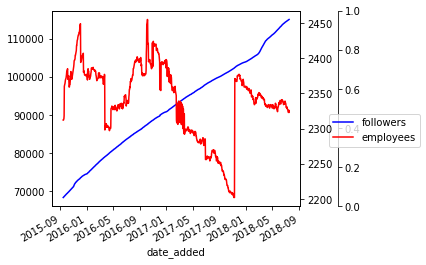

In [8]:
# https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

activision_df.followers_count.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
activision_df.employees_on_platform.plot(ax=ax, style='r-', secondary_y=True)
#df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
           ['followers','employees'], bbox_to_anchor=(1.5, 0.5))
plt.show()


## ToDo
- Number of job offerings per week/month (resample)

# Activision Googletrends

In [9]:
activision_googletrends_df.index = activision_googletrends_df.Week
del activision_googletrends_df['Week']
activision_googletrends_df.columns = ['google_trend']

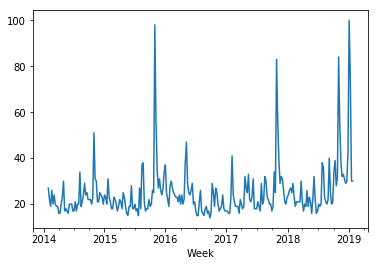

In [26]:
activision_googletrends_df.google_trend.plot()
plt.show()

# Activision Stock

In [28]:
activision_stock_df.index = activision_stock_df.Date
del activision_stock_df['Date']

AttributeError: 'DataFrame' object has no attribute 'Date'

In [29]:
activision_stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-03,17.350000,17.350000,16.910000,17.059999,16.405760,7001900
2014-02-04,17.059999,17.139999,16.799999,16.900000,16.251896,5463700
2014-02-05,16.879999,16.969999,16.639999,16.889999,16.242279,5566000
2014-02-06,16.990000,17.200001,16.950001,17.170000,16.511543,7359100
2014-02-07,18.950001,19.950001,18.780001,19.639999,18.886816,29880800


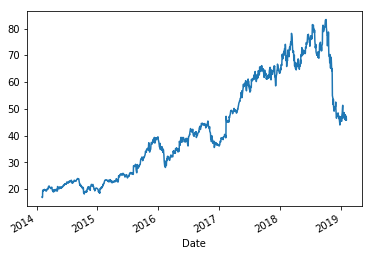

In [32]:
activision_stock_df.Close.plot()
plt.show()

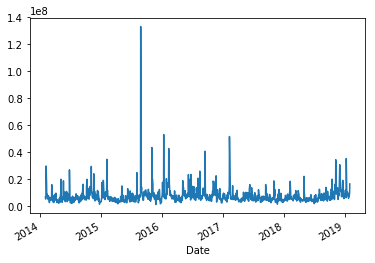

In [34]:
activision_stock_df.Volume.plot()
plt.show()
# what happened at the peaks?

## ToDo
- Difference between High/Low
- Resample?
- Look at volume

# More data sources?
- Something about other game publishers?
- Glassdoor data? https://www.glassdoor.de/Jobs/Activision-Blizzard-Jobs-E605784.htm?filter.radius=31 need to find a way to download it

# Ideas
- Number of job openings good indicator of stock price?
- gg